In [1]:
import math
import numpy as np
#import time
import pandas as pd
import math
import seaborn as sns
#t_start = time.time()
# min_step = int(input("最小の"))

# step_width = int(input())

#外周の半径を定義
#     r = int(input("外径の半径を入力(mm)"))
#     r_i  = int(input("内径の半径を入力(mm)"))
#     r_h = int(input("光を受け取る位置を入力(mm)(外径の半径よりも大きくすること)"))
#回転中心を変える説

r = 10000
r_i = 3000
# r_i = round(r_i)
r_h = 100000
tes = r

def array(xlist,ylist):
    keep_x = []
    keep_y = []
    keep_x = [i*-1 for i in xlist[::-1]]
    keep_y = [i for i in ylist[::-1]]

    return xlist + keep_x,ylist + keep_y

#解の公式
def quadratic_formula(a,b,r,x,grad,change_g):
    if a==1 or a==-1:
#         print("解の公式が適応できません")
        return 0
    else:
        global tes
        if grad<0:   
            #判別式で直線と交わっているか確かめる
            D = pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))
            if D<0:
    #             print("光線が内周の円と交わっていません")
                #内周と接さずに外周と接する
    #             print("tes",tes)
                if x<0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(tes,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(tes,2))))/(1+pow(a,2))
            elif D == 0:
                print("直線と円が接しています")
                if change_g == 1:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
                
                if x<0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
            else:
                if change_g == 1:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
                
                if x<0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
        else:
            #判別式で直線と交わっているか確かめる
            D = pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))
            if D<0:
    #             print("光線が内周の円と交わっていません")
                #内周と接さずに外周と接する
    #             print("tes",tes)
                if x<0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(tes,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(tes,2))))/(1+pow(a,2))
            elif D == 0:
                print("直線と円が接しています")
                if x<0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2)) 
            else:
                if x<0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))            
            


#直線の傾き
def katamuki(n_i ,n_r ,x_i,y_i,sita_h_i,sita_r_i,sita_i,sin_i):
    if n_i>n_r:
        sin_c = n_r/n_i
        sita_c = np.arcsin(sin_c)
        if sita_c > sita_i:
            #屈折しつつ透過
            #屈折角を求める
            sin_r = n_i*sin_i/n_r
            sita_r = np.arcsin(sin_r)
            #同じものでよさそう
            if x_i<0:
                if y_i>0:
                    gradient_i = np.tan(-(sita_h_i+sita_r))
                    return gradient_i
                if y_i<0:
                    gradient_i = np.tan(-(np.radians(180)-(sita_h_i+sita_r)))
                    #print("テストgrad",gradient_i)

                    return gradient_i
            elif x_i ==0:
                print("x_i=0")
            elif x_i>0:
                if y_i>0:
                    gradient_i = np.tan(-(np.radians(180)-(sita_h_i+sita_r)))
                    return gradient_i
                if y_i<0:
                    gradient_i = np.tan(-(sita_h_i+sita_r))
                    return gradient_i

        else:
            #全反射
            sita_r = sita_i

            if x_i<0:
                gradient_i = np.tan(-(np.radians(180)-(sita_r-sita_h_i)))
                return gradient_i
            elif x_i==0:
                print("おそらく存在しない")
            elif x_i>0:
                gradient_i = np.tan(-(sita_r-sita_h_i))
                return gradient_i
    else:
        if x_i<0:
            if y_i>0:
                gradient_i = np.tan(-(sita_h_i+sita_r_i))
                return gradient_i
            if y_i<0:
                gradient_i = np.tan(-(np.radians(180)-(sita_h_i+sita_r_i)))
                return gradient_i
        elif x_i ==0:
            print("x_i=0")
        elif x_i>0:
            if y_i>0:
                gradient_i = np.tan(-(np.radians(180)-(sita_h_i+sita_r_i)))
                return gradient_i
            if y_i<0:
                gradient_i = np.tan(-(sita_h_i+sita_r_i))
                return gradient_i


#角計測部分
#全反射0 その他１
def calculate_angle_and_(n_i ,n_r ,x ,y ,x_i ,y_i, r_i,change, change_grad):
    
    
    #求めたい角度に必要な2つの直線
    #1.y軸に平行な直線の式はx=h → 0*y+1*x-h=0
    a = -(y_i - y)
    b = x_i - x
    #2.接線に垂直な直線→便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
    c = y_i
    d = -x_i
    if a*c + b*d == 0:
#         print("a*c + b*d",a*c + b*d)
        return 0,0,0,0,0,0
    #2直線の成す角→入射角
    tan = (abs(a*d - b*c))/(abs(a*c + b*d))
    sita_i = np.arctan(tan)
    #スネルの法則にひつような入射角のsin
    sin_i = np.sin(sita_i)

    #テス
    a_h = 0
    b_h = 1
    if a_h*c + b_h*d == 0:
#         print("a*c + b*d",a*c + b*d)
        return 0,0 ,0,0,0 ,0
    tan2 = (abs(a_h*d - b_h*c))/(abs(a_h*c + b_h*d))
    sita_h_i = np.arctan(tan2)
    sin_h_i = np.sin(sita_h_i)
#     print("n_i",n_i)
#     print("n_r",n_r)
#     print("sin_i",sin_i)
    if change == 0:
        sita_r = sita_i
#         print("calcの中、全反射だよ")
    else:
        sin_r = n_i*sin_i/n_r
        if sin_r > 1:
#             print("sinが1を超えてる")
            return 0,0,0,0,0,0
        sita_r = np.arcsin(sin_r)


    gradient_i = katamuki(n_i ,n_r ,x_i,y_i,sita_h_i,sita_r,sita_i,sin_i) 
    if gradient_i == None:
#         print("てすと")
        return 0,0,0,0,0,0
    y_intercept_i = y_i - gradient_i * x_i
#     print("gradient_i",gradient_i,y_intercept_i,r_i,x_i,gradient_i, change_grad)
    x_i_i = quadratic_formula(gradient_i,y_intercept_i,r_i,x_i,gradient_i, change_grad)
    if math.isnan(x_i_i):
        return 0,0,0,0,0,0
        
    y_i_i = gradient_i*x_i_i + y_intercept_i
#     print("y_i_i",y_i_i)
    
    #y一定での座標も追加
    global r_h
    y_const = -r_h
    x_const_ans = (y_const - y_intercept_i)/gradient_i
    
    #角度追加
    if x_i_i < 0:
        beta = sita_r + sita_h_i
    else:
        beta = np.pi - (sita_r + sita_h_i)
    return x_i_i ,y_i_i ,beta ,gradient_i, y_intercept_i, x_const_ans




xlist = []
ylist = []
xlist_d = []
ylist_d = []
xlist_z = []
ylist_z = []
x_a_list = []
y_a_list = []
x_d_list = []
y_d_list = []
test_x = []
test_y = []
sita_v_list = []
gradient_list = []
intercept_list = []
gradient_half_list = []
intercept_half_list = []
x_const_halflist = []
x_const_list = []
y_const_list = []
zen_x_1 = []
zen_y_1 = []
zen_x_2 = []
zen_y_2 = []
zen_x_3 = []
zen_y_3 = []
zen_x_4 = []
zen_y_4 = []
toka_x_1 = []
toka_y_1 = []
toka_x_2 = []
toka_y_2 = []
toka_x_3 = []
toka_y_3 = []
n_toka_x_1 = []
n_toka_y_1 = []
n_toka_x_2 = []
n_toka_y_2 = []
n_toka_x_3 = []
n_toka_y_3 = []
naibu_x_1 = []
naibu_y_1 = []
naibu_x_2 = []
naibu_y_2 = []
naibu_x_3 = []
naibu_y_3 = []
naibu_x_4 = []
naibu_y_4 = []
naibu_x_5 = []
naibu_y_5 = []
n_naibu_x_1 = []
n_naibu_y_1 = []
n_naibu_x_2 = []
n_naibu_y_2 = []
n_naibu_x_3 = []
n_naibu_y_3 = []
n_naibu_x_4 = []
n_naibu_y_4 = []
n_naibu_x_5 = []
n_naibu_y_5 = []



cnt=0
arg = 100000

change_d = 0


# for x in range(-r+1,r):
for x in range(-r+1,0):
    if x == 0:
        continue
#     print("x",x)
    #最初
    y = 0
    x_i = x
    y_i = np.sqrt(pow(r,2)-pow(x_i,2))

    n_i = 1.000292
    n_r = 1.49
    #2つ目の座標
    #ここで内径に接しない場合も考える必要がある。
    #おかしいっぽい -> 全部接することになってる？ -> おそらくD<0がうまくとれてない
    x_i_i, y_i_i,beta,g_empty,i_empty, x_const_empty = calculate_angle_and_(n_i ,n_r ,x ,y ,x_i ,y_i, r_i,1,1)     
#     print("きてる？",x_i_i,y_i_i)
#     x_d_list.append(x_i_i)
#     y_d_list.append(y_i_i)
#     new_x_d_list,new_y_d_list = array(x_d_list, y_d_list)
#     print("1回目のcalc")
    if x_i_i == 0 and y_i_i == 0:
#         print("--------------------------------------")
        cnt +=1
        continue
#     print(pow(x_i_i,2)+pow(y_i_i,2),pow(r_i-1,2))
    #おかしい
    if pow(x_i_i,2)+pow(y_i_i,2) > pow(r_i+0.5,2):
#         print("-------------------------------------")
#         print("D<0ルート")
#         print("きてる2？")

        n_i = 1.49
        n_r = 1.000292
        sin_c = n_r/n_i
        sita_c = np.arcsin(sin_c)    
        a = -(y_i_i - y_i)
        b = x_i_i - x_i
        c = y_i_i
        d = -x_i_i
        tan = (abs(a*d - b*c))/(abs(a*c + b*d))
        if a*c + b*d == 0:
            continue
        sita_i = np.arctan(tan)
        if sita_c < sita_i:
            continue

        n_i = 1.49
        n_r = 1.000292
        cnt +=1
        
        x_d_get,y_d_get,beta,gradient,intercept, x_const = calculate_angle_and_(n_i ,n_r ,x_i ,y_i ,x_i_i ,y_i_i, r_h,1,0)
        a = -(y_d_get - y_i_i)
        b = x_d_get - x_i_i
        c = 1
        d = 0    
        tan = (abs(a*d - b*c))/(abs(a*c + b*d))
        if a*c + b*d == 0:
            continue
#         alfa = abs(np.arccos(x_d_get/r_h) - np.pi)
#         slit = abs(np.rad2deg(alfa)-np.rad2deg(beta))
#         if arg < slit:
#             continue
        if 0<=y_d_get:
#             print("-------------------------------------")
            continue
    
        keep_change_x = abs(x_i_i)
        keep_change_y = y_i_i
        
        #D<0の描画用
        
        toka_x_1.append(x_i)
        toka_y_1.append(y_i)
        toka_x_2.append(x_i_i)
        toka_y_2.append(y_i_i)
        toka_x_3.append(x_d_get)
        toka_y_3.append(y_d_get)
        
        sita_v = np.arctan(tan)
        sita_v_list.append(sita_v)
        x_d_list.append(x_i_i)
        y_d_list.append(y_i_i)
        test_x.append(x_i)
        test_y.append(y_i)
        #new_x_d_list,new_y_d_list = array(x_d_list, y_d_list)

        #外周の座標点
        x_a_list.append(x_i_i)
        y_a_list.append(y_i_i)
        #new_x_a_list,new_y_a_list = array(x_a_list,y_a_list)
        #最後の傾きと切片
        gradient_half_list.append(gradient)
        intercept_half_list.append(intercept)
        #gradient_list, intercept_list = array(gradient_half_list,intercept_half_list) 
        
        #y一定での受光(x座標)
        x_const_halflist.append(x_const)

#         xlist_d.append(x_d_get)
#         ylist_d.append(y_d_get)
#         new_xlist_d,new_ylist_d = array(xlist_d, ylist_d)
        xlist.append(x_d_get)
        ylist.append(y_d_get)
#         print("-------------------------------------")
    else:
        change_d += 1
#         print("きてる3？")
        #内側→外
#         print("D>0ルート")
        n_i = 1.49
        n_r = 1.000292
        sin_c = n_r/n_i
        sita_c = np.arcsin(sin_c)    
        a = -(y_i_i - y_i)
        b = x_i_i - x_i
        c = y_i_i
        d = -x_i_i

        tan = (abs(a*d - b*c))/(abs(a*c + b*d))
        if a*c + b*d == 0:
            continue
        sita_i = np.arctan(tan)        
        #3つ目の座標 透過or全反射→どう分けよう とりあえずaをトリガーにする？→aと半径をトリガーにする？
        #ここのrが問題→全反射と内部を透過する場合で代入しなければならない半径が異なる
        if sita_c > sita_i:
            #x_i_iがx_i_i_iとおなじになってる　てかx_i_iがおかしい
            x_i_i_i, y_i_i_i,beta,g_empty,i_empty,x_const_empty = calculate_angle_and_(n_i ,n_r ,x_i ,y_i ,x_i_i ,y_i_i, r_i,1,0)
            
#             print("2回目のcalc　内部")
            if x_i_i_i == 0 and y_i_i_i == 0:
#                 print("--------------------------------------")
                cnt +=1
                continue
            
            n_i = 1.000292
            n_r = 1.49 
            #外周の座標
            #今次に全反射するデータも全てとっている気がする -> 透過の方も
            x_i_i_r, y_i_i_r,beta,g_empty,i_empty,x_const_empty = calculate_angle_and_(n_i ,n_r ,x_i_i ,y_i_i ,x_i_i_i ,y_i_i_i, r,1,0)
            n_i = 1.49
            n_r = 1.000292
            sin_c = n_r/n_i
            sita_c = np.arcsin(sin_c)    
            a = -(y_i_i_r - y_i_i_i)
            b = x_i_i_r - x_i_i_i
            c = y_i_i_r
            d = -x_i_i_r
            tan = (abs(a*d - b*c))/(abs(a*c + b*d))
            if a*c + b*d == 0:
                continue
            sita_i = np.arctan(tan)
            if sita_c < sita_i:
                continue

#             print("3回目のcalc")
            if x_i_i_r == 0 and y_i_i_r == 0:
#                 print("--------------------------------------")
#                 cnt +=1
                continue
            n_i = 1.49
            n_r = 1.000292
            x_get,y_get,beta,gradient,intercept, x_const = calculate_angle_and_(n_i ,n_r ,x_i_i_i ,y_i_i_i ,x_i_i_r ,y_i_i_r, r_h,1,0)
#             x_get,y_get,beta,gradient,intercept, x_const = 0, 1, 0, 0, 0, 0
            alfa = abs(np.arccos(x_get/r_h) - np.pi)
            slit = abs(np.rad2deg(alfa)-np.rad2deg(beta))
            if arg < slit or 0 < y_get:
                continue
#             print("最後のcalc　内部透過")
#             print("--------------------------------------")

            #Dの境界を見つける
            if change_d == 1:
                print("内部",r+x)
                
            naibu_x_1.append(x_i)
            naibu_y_1.append(y_i)
            naibu_x_2.append(x_i_i)
            naibu_y_2.append(y_i_i)
            naibu_x_3.append(x_i_i_i)
            naibu_y_3.append(y_i_i_i)
            naibu_x_4.append(x_i_i_r)
            naibu_y_4.append(y_i_i_r)
            naibu_x_5.append(x_get)
            naibu_y_5.append(y_get)

#             naibu_x_1.append(0)
#             naibu_y_1.append(0)
#             naibu_x_2.append(0)
#             naibu_y_2.append(0)
#             naibu_x_3.append(0)
#             naibu_y_3.append(0)
#             naibu_x_4.append(0)
#             naibu_y_4.append(0)
#             naibu_x_5.append(0)
#             naibu_y_5.append(0)
        
        
        elif sita_c < sita_i:      
#             print("全反射ルート")
            #外周の座標
            x_i_i_r, y_i_i_r,beta,g_empty,i_empty,x_const_empty = calculate_angle_and_(n_i ,n_r ,x_i ,y_i ,x_i_i ,y_i_i, r,0,0)
#             print("2回目のcalc 全反射")
            if x_i_i_r == 0 and y_i_i_r == 0:
#                 print("--------------------------------------")
                cnt +=1
                continue
            

            n_i = 1.49
            n_r = 1.000292
            sin_c = n_r/n_i
            sita_c = np.arcsin(sin_c)    
            a = -(y_i_i_r - y_i_i)
            b = x_i_i_r - x_i_i
            c = y_i_i_r
            d = -x_i_i_r
            tan = (abs(a*d - b*c))/(abs(a*c + b*d))
            if a*c + b*d == 0:
                continue
            sita_i = np.arctan(tan)
            if sita_c < sita_i:
                continue

            x_get,y_get,beta,gradient,intercept,x_const = calculate_angle_and_(n_i ,n_r ,x_i_i ,y_i_i ,x_i_i_r ,y_i_i_r, r_h,1,0)
            alfa = abs(np.arccos(x_get/r_h) - np.pi)
            slit = abs(np.rad2deg(alfa)-np.rad2deg(beta))
#             print("slitの中身",slit)
            if arg < slit:
                continue
#             print("最後のcalc　全反射")
#             print("--------------------------------------")
            if 0<=y_get or 0 < x_get :
                continue
            
            #Dの境界を見つける
            if change_d == 1:
                print("全反射",r+x)
                
            zen_x_1.append(x_i)
            zen_y_1.append(y_i)
            zen_x_2.append(x_i_i)
            zen_y_2.append(y_i_i)
            zen_x_3.append(x_i_i_r)
            zen_y_3.append(y_i_i_r)
            zen_x_4.append(x_get)
            zen_y_4.append(y_get)
            
            #new_xlist_z,new_ylist_z = array(xlist_z,ylist_z)
        if 0<=y_get:
            continue

        #外周の座標点
        x_a_list.append(x_i_i_r)
        y_a_list.append(y_i_i_r)

        #最後の傾きと切片
        gradient_half_list.append(gradient)
        intercept_half_list.append(intercept)

        
        #y一定での受光(x座標)
        x_const_halflist.append(x_const)
        
        xlist.append(x_get)
        ylist.append(y_get)

        
emplist = [r_h]*len(x_const_halflist)
new_x_a_list,new_y_a_list = array(x_a_list,y_a_list)    
gradient_list, intercept_list = array(gradient_half_list,intercept_half_list)
x_const_list, y_const_list = array(x_const_halflist, emplist)
new_xlist, new_ylist = array(xlist,ylist)

n_zen_x_1, n_zen_y_1 = array(zen_x_1, zen_y_1)
n_zen_x_2, n_zen_y_2 = array(zen_x_2, zen_y_2)
n_zen_x_3, n_zen_y_3 = array(zen_x_3, zen_y_3)
n_zen_x_4, n_zen_y_4 = array(zen_x_4, zen_y_4)

n_toka_x_1, n_toka_y_1 = array(toka_x_1, toka_y_1)
n_toka_x_2, n_toka_y_2 = array(toka_x_2, toka_y_2)
n_toka_x_3, n_toka_y_3 = array(toka_x_3, toka_y_3)

n_naibu_x_1, n_naibu_y_1 = array(naibu_x_1, naibu_y_1)
n_naibu_x_2, n_naibu_y_2 = array(naibu_x_2, naibu_y_2)
n_naibu_x_3, n_naibu_y_3 = array(naibu_x_3, naibu_y_3)
n_naibu_x_4, n_naibu_y_4 = array(naibu_x_4, naibu_y_4)
n_naibu_x_5, n_naibu_y_5 = array(naibu_x_5, naibu_y_5)

num_tes = len(new_x_a_list)
change_d_x = [0]*num_tes
change_d_y = [0]*num_tes
#最後に残ってる点 D<0
change_d_x[0] = keep_change_x
change_d_y[0] = keep_change_y

df = pd.DataFrame({
    'x':new_x_a_list,
    'y':new_y_a_list,
    'gradient':gradient_list,
    'intercept':intercept_list,
    'change_x':change_d_x,
    'change_y':change_d_y
})

df.to_csv("./data_csv3/dataset_r_i_{0}_r_{1}.csv".format(r_i, r), index=False)

#         t_end = time.time()
#         elapsed_time = t_end-t_start
#         print(f"経過時間：{elapsed_time/60}分")

全反射 5532


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74078 entries, 0 to 74077
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x          74078 non-null  float64
 1   y          74078 non-null  float64
 2   gradient   74078 non-null  float64
 3   intercept  74078 non-null  float64
 4   change_x   74078 non-null  float64
 5   change_y   74078 non-null  float64
dtypes: float64(6)
memory usage: 3.4 MB


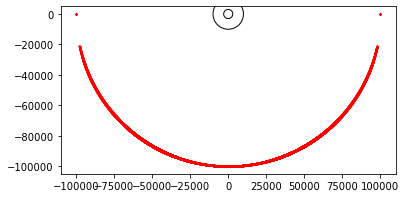

In [2]:
#全部の座標表示

import matplotlib.pyplot as plt
import matplotlib.patches as patches

g = plt.subplot()
#外径
draw_circle_r = plt.Circle((0, 0), r, fill=False)
#内径
draw_circle_i = plt.Circle((0, 0), r_i, fill=False)
g.add_artist(draw_circle_r)
g.add_artist(draw_circle_i)
g.plot(new_xlist, new_ylist, marker="o", color = "red", linestyle = " ",markersize=1)

g.set_aspect('equal')


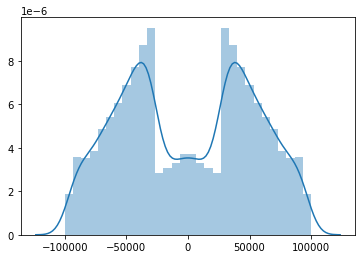

In [3]:
import seaborn as sns
sns.distplot(new_xlist)

2276


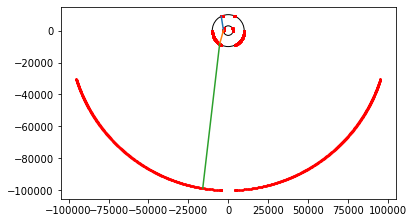

In [4]:
# 全反射の外径通過点
import matplotlib.pyplot as plt
import matplotlib.patches as patches

print(len(n_zen_x_4))

g = plt.subplot()
#外径
draw_circle_r = plt.Circle((0, 0), r, fill=False)
#内径
draw_circle_i = plt.Circle((0, 0), r_i, fill=False)
g.add_artist(draw_circle_r)
g.add_artist(draw_circle_i)
# g.plot(new_x_a_list, new_y_a_list, marker="o", color = "red", linestyle = " ",markersize=1)

#線追加
# g.plot(new_x_d_list,new_y_d_list, marker="o", color = "red", linestyle = " ",markersize=1)
# g.plot(test_x,test_y, marker="o", color = "red", linestyle = " ",markersize=1)
n = 100
g.plot(n_zen_x_1,n_zen_y_1, marker="o", color = "red", linestyle = " ",markersize=1)
g.plot(n_zen_x_2,n_zen_y_2, marker="o", color = "red", linestyle = " ",markersize=1)
g.plot(n_zen_x_3,n_zen_y_3, marker="o", color = "red", linestyle = " ",markersize=1)
g.plot(n_zen_x_4,n_zen_y_4, marker="o", color = "red", linestyle = " ",markersize=1)
g.plot([n_zen_x_1[n],n_zen_x_2[n]],[n_zen_y_1[n],n_zen_y_2[n]])
g.plot([n_zen_x_2[n],n_zen_x_3[n]],[n_zen_y_2[n],n_zen_y_3[n]])
g.plot([n_zen_x_3[n],n_zen_x_4[n]],[n_zen_y_3[n],n_zen_y_4[n]])
# g.plot(new_xlist_d, new_ylist_d, marker="o", color = "red", linestyle = " ",markersize=1)
# g.plot([new_xlist_d[100],new_x_d_list[100]],[new_ylist_d[100],new_y_d_list[100]])


g.set_aspect('equal')



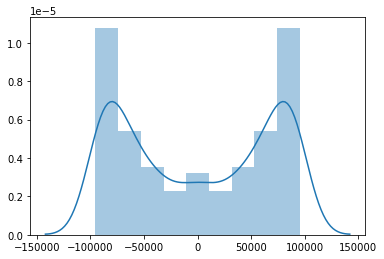

In [5]:
sns.distplot(n_zen_x_4)

10956


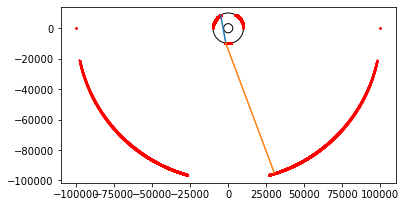

In [7]:
# D<0
import matplotlib.pyplot as plt
import matplotlib.patches as patches



g = plt.subplot()
#外径
draw_circle_r = plt.Circle((0, 0), r, fill=False)
#内径
draw_circle_i = plt.Circle((0, 0), r_i, fill=False)
g.add_artist(draw_circle_r)
g.add_artist(draw_circle_i)
# g.plot(new_x_a_list, new_y_a_list, marker="o", color = "red", linestyle = " ",markersize=1)
print(len(n_toka_x_1))
#線追加
# g.plot(new_x_d_list,new_y_d_list, marker="o", color = "red", linestyle = " ",markersize=1)
# g.plot(test_x,test_y, marker="o", color = "red", linestyle = " ",markersize=1)
n = 5000
g.plot(n_toka_x_1,n_toka_y_1, marker="o", color = "red", linestyle = " ",markersize=1)
g.plot(n_toka_x_2,n_toka_y_2, marker="o", color = "red", linestyle = " ",markersize=1)
g.plot(n_toka_x_3,n_toka_y_3, marker="o", color = "red", linestyle = " ",markersize=1)

g.plot([n_toka_x_1[n],n_toka_x_2[n]],[n_toka_y_1[n],n_toka_y_2[n]])
g.plot([n_toka_x_2[n],n_toka_x_3[n]],[n_toka_y_2[n],n_toka_y_3[n]])
# g.plot(new_xlist_d, new_ylist_d, marker="o", color = "red", linestyle = " ",markersize=1)
# g.plot([new_xlist_d[100],new_x_d_list[100]],[new_ylist_d[100],new_y_d_list[100]])


g.set_aspect('equal')


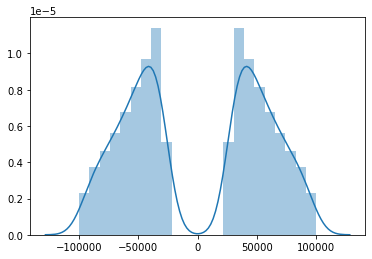

In [8]:
sns.distplot(n_toka_x_3)

5516


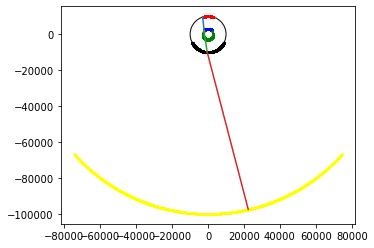

In [9]:
# 内部透過
import matplotlib.pyplot as plt
import matplotlib.patches as patches



g = plt.subplot()
#外径
draw_circle_r = plt.Circle((0, 0), r, fill=False)
#内径
draw_circle_i = plt.Circle((0, 0), r_i, fill=False)
g.add_artist(draw_circle_r)
g.add_artist(draw_circle_i)
# g.plot(new_x_a_list, new_y_a_list, marker="o", color = "red", linestyle = " ",markersize=1)

#線追加
# g.plot(new_x_d_list,new_y_d_list, marker="o", color = "red", linestyle = " ",markersize=1)
# g.plot(test_x,test_y, marker="o", color = "red", linestyle = " ",markersize=1)
n = 0
g.plot(n_naibu_x_1,n_naibu_y_1, marker="o", color = "red", linestyle = " ",markersize=1)
g.plot(n_naibu_x_2,n_naibu_y_2, marker="o", color = "blue", linestyle = " ",markersize=1)
g.plot(n_naibu_x_3,n_naibu_y_3, marker="o", color = "green", linestyle = " ",markersize=1)
g.plot(n_naibu_x_4,n_naibu_y_4, marker="o", color = "black", linestyle = " ",markersize=1)
g.plot(n_naibu_x_5,n_naibu_y_5, marker="o", color = "Yellow", linestyle = " ",markersize=1)

g.plot([n_naibu_x_1[n],n_naibu_x_2[n]],[n_naibu_y_1[n],n_naibu_y_2[n]])
g.plot([n_naibu_x_2[n],n_naibu_x_3[n]],[n_naibu_y_2[n],n_naibu_y_3[n]])
g.plot([n_naibu_x_3[n],n_naibu_x_4[n]],[n_naibu_y_3[n],n_naibu_y_4[n]])
g.plot([n_naibu_x_4[n],n_naibu_x_5[n]],[n_naibu_y_4[n],n_naibu_y_5[n]])

# g.plot(new_xlist_d, new_ylist_d, marker="o", color = "red", linestyle = " ",markersize=1)
# g.plot([new_xlist_d[100],new_x_d_list[100]],[new_ylist_d[100],new_y_d_list[100]])

print(len(n_naibu_x_1))
g.set_aspect('equal')

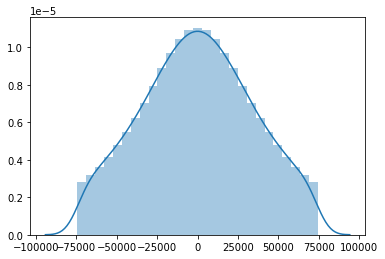

In [10]:
import seaborn as sns
sns.distplot(n_naibu_x_5)

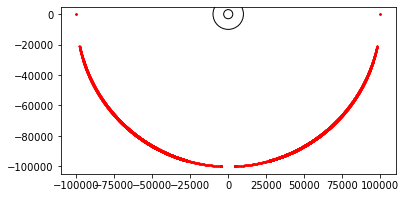

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

test1_x = []
test1_y = []
# test1_x = n_naibu_x_5 + n_toka_x_3 + n_zen_x_4
# test1_y = n_naibu_y_5 + n_toka_y_3 + n_zen_y_4
test1_x = n_toka_x_3 + n_zen_x_4
test1_y = n_toka_y_3 + n_zen_y_4

g = plt.subplot()
#外径
draw_circle_r = plt.Circle((0, 0), r, fill=False)
#内径
draw_circle_i = plt.Circle((0, 0), r_i, fill=False)
g.add_artist(draw_circle_r)
g.add_artist(draw_circle_i)
g.plot(test1_x, test1_y, marker="o", color = "red", linestyle = " ",markersize=1)

g.set_aspect('equal')

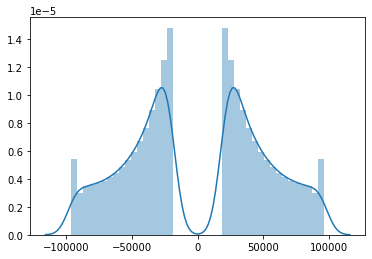

In [12]:
sns.distplot(test1_x)